# Data and Libraries

In [1]:
install.packages("tidyverse")
library(tidyverse)
install.packages("recommenderlab")
library(recommenderlab)
install.packages("gridExtra")
library(gridExtra)
data(MovieLense)
library(testthat)


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/mw/x398f5s545bffd989r6xpm100000gp/T//Rtmplg67Ty/downloaded_packages


Warning message:
"Paket 'lubridate' wurde unter R Version 4.3.1 erstellt"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.3     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/mw/x398f5s545bffd989r6xpm100000gp/T//Rtmplg67Ty/downloaded_packages


Warning message:
"Paket 'recommenderlab' wurde unter R Version 4.3.1 erstellt"
Lade n"otiges Paket: Matrix


Attache Paket: 'Matrix'


Die folgenden Objekte sind maskiert von 'package:tidyr':

    expand, pack, unpack


Lade n"otiges Paket: arules


Attache Paket: 'arules'


Das folgende Objekt ist maskiert 'package:dplyr':

    recode


Die folgenden Objekte sind maskiert von 'package:base':

    abbreviate, write


Lade n"otiges Paket: proxy


Attache Paket: 'proxy'


Das folgende Objekt ist maskiert 'package:Matrix':

    as.matrix


Die folgenden Objekte sind maskiert von 'package:stats':

    as.dist, dist


Das folgende Objekt ist maskiert 'package:base':

    as.matrix


Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy




Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/mw/x398f5s545bffd989r6xpm100000gp/T//Rtmplg67Ty/downloaded_packages



Attache Paket: 'gridExtra'


Das folgende Objekt ist maskiert 'package:dplyr':

    combine


Warning message:
"Paket 'testthat' wurde unter R Version 4.3.1 erstellt"

Attache Paket: 'testthat'


Das folgende Objekt ist maskiert 'package:dplyr':

    matches


Das folgende Objekt ist maskiert 'package:purrr':

    is_null


Die folgenden Objekte sind maskiert von 'package:readr':

    edition_get, local_edition


Das folgende Objekt ist maskiert 'package:tidyr':

    matches




# Methods

In [2]:
methods(class = class(MovieLense))

 [1] Recommender            [                      [<-                   
 [4] binarize               calcPredictionAccuracy coerce                
 [7] colCounts              colMeans               colSds                
[10] colSums                denormalize            dim                   
[13] dimnames               dimnames<-             dissimilarity         
[16] evaluationScheme       getData.frame          getList               
[19] getNormalize           getRatingMatrix        getRatings            
[22] getTopNLists           hasRating              image                 
[25] normalize              nratings               removeKnownRatings    
[28] rowCounts              rowMeans               rowSds                
[31] rowSums                sample                 show                  
[34] similarity            
see '?methods' for accessing help and source code

# Dataframes

In [3]:
df <- as(MovieLense, "data.frame")
dfMeta <- as(MovieLenseMeta, "data.frame")

# First Insights
We see that the dataframe contains 99'392 ratings with 943 users. The mininum rating is 1 and the maximum rating is 5, furthermore the average of all ratings is 3.53.

In [4]:
head(df)

,user,item,rating
,<chr>,<chr>,<dbl>
1,1,Toy Story (1995),5
453,1,GoldenEye (1995),3
584,1,Four Rooms (1995),4
674,1,Get Shorty (1995),3
883,1,Copycat (1995),3
969,1,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),5


In [5]:
tail(df)

,user,item,rating
,<chr>,<chr>,<dbl>
93643,943,Multiplicity (1996),2
94227,943,Bottle Rocket (1996),2
94450,943,Reality Bites (1994),4
96451,943,Young Guns II (1990),3
97147,943,Under Siege 2: Dark Territory (1995),3
98112,943,An Unforgettable Summer (1994),3


In [6]:
summary(df)

     user               item               rating    
 Length:99392       Length:99392       Min.   :1.00  
 Class :character   Class :character   1st Qu.:3.00  
 Mode  :character   Mode  :character   Median :4.00  
                                       Mean   :3.53  
                                       3rd Qu.:4.00  
                                       Max.   :5.00  

In [7]:
# count the number of ratings per user
user_ratings <- table(df$user)
test_that("if its the sum of user ratings", {
    expect_equal(as.vector(user_ratings)[1], sum(df$user == 1))
    expect_equal(as.vector(user_ratings)[2], sum(df$user == 10))
})

# count the number of unique users
num_users <- length(unique(df$user))

# count the number of movies
num_movies <- length(unique(df$item))

# total number of possible ratings
totalRatings <- num_users * num_movies

# count the number of missing ratings
num_missing_ratings <- totalRatings - length(df$rating)

# count the number of users who have not rated at least one movie
num_users_missing_rating <- sum(user_ratings == 0)

cat("Number of unique users:", num_users, "\n")
cat("Number of unique movies:", num_movies, "\n")
cat("Total number of possible ratings:", totalRatings, "\n")
cat("Number of given ratings:", nrow(df), "\n")
cat("Number of missing ratings:", num_missing_ratings, "\n")
cat("Number of users who have not rated at least one movie:", num_users_missing_rating, "\n")

Test passed 
Number of unique users: 943 
Number of unique movies: 1664 
Total number of possible ratings: 1569152 
Number of given ratings: 99392 
Number of missing ratings: 1469760 
Number of users who have not rated at least one movie: 0 


## 6.1 Explorative Datenanalyse
### 1. Welches sind die am häufigsten geschauten Genres/Filme?

Test passed 


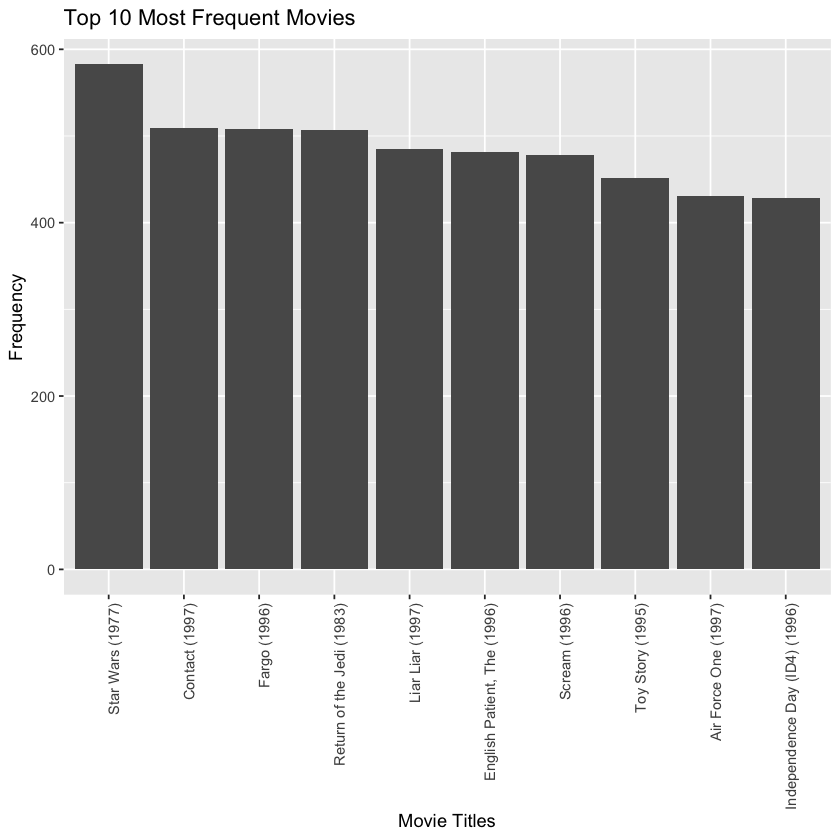

In [8]:
# load necessary libraries
library(dplyr)
library(ggplot2)
# Count the frequency of each movie and create  a new data frame
movieCount <- df %>%
    group_by(item) %>%
    summarize(freq = n()) %>%
    arrange(desc(freq))

test_that("movieCount has the right frequency", {
    result <- sum(movieCount$freq)
    expect_equal(result, nrow(df))
    }
)

# Plot the top 10 most frequent movies
ggplot(
    head(movieCount, 10),
    aes(x = reorder(item, -freq), y = freq)) +
    geom_bar(stat = "identity") +
    xlab("Movie Titles") +
    ylab("Frequency") +
    ggtitle("Top 10 Most Frequent Movies") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)
)

We see the top 10 most frequent watched movies, further below we investigate which genres are the most frequent watched.

Test passed 


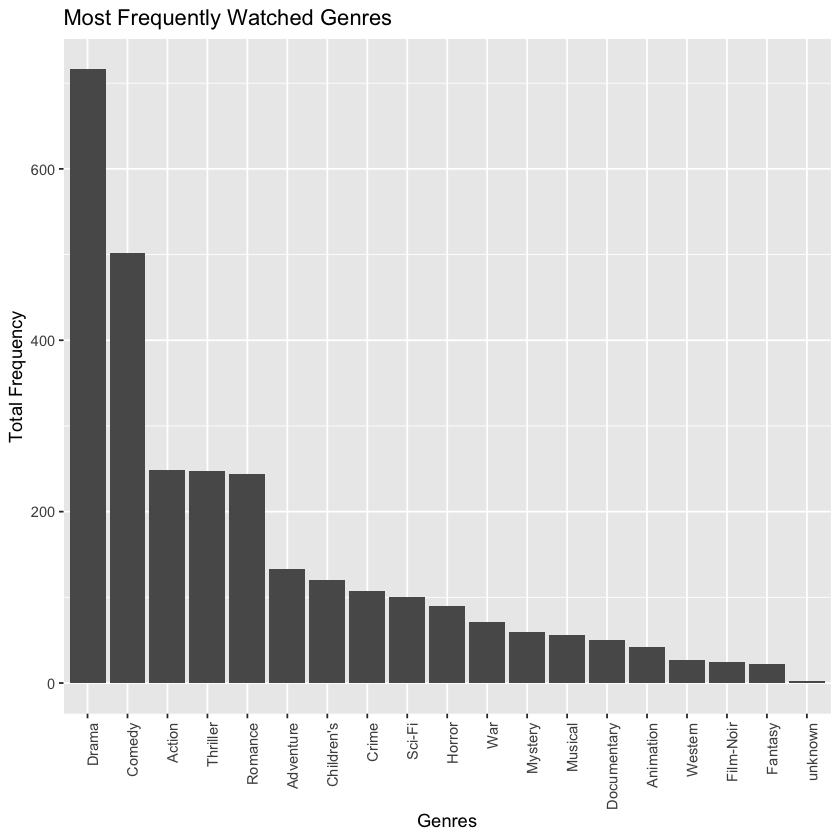

In [9]:
# TODO create repo and invite tobias.lauber1
# TODO comment all plots

# Count the frequency of each genre and create a new data frame
merged <- left_join(df, dfMeta, by = c("item" = "title"))
# Summarize by Genre
dfMetaGenres <- select(dfMeta, -(1:3))
# sum all genre columns
genreCount <- colSums(dfMetaGenres, na.rm = TRUE)
# create df
genreCountDf <- data.frame(genre = names(genreCount), freq = genreCount)

# Test stuff
test_that("genreCountDf has the right frequency", {
    result <- sum(genreCountDf$freq)
    expect_equal(result, sum(genreCount))
    }
)

# Plot the top most frequent genres in descending order
ggplot(
  genreCountDf,
  aes(x = reorder(genre, -freq), y = freq)) +
  geom_bar(stat = "identity") +
  xlab("Genres") +
  ylab("Total Frequency") +
  ggtitle("Most Frequently Watched Genres") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)
)

The plot shows the most frequently watches genres in descending order.  
There is a clear imbalance in the genres, which can lead to a popularity bias, say the tendency to recommend popular items.  
Which in turn can lead to even more people watching dramas and reinforce the bias.  
An additional problem is that the same movie can be categorized in multiple genres, which can be misleading for the interpretation of the data.

### 2. Wie verteilen sich die Nutzerratings der Filme gesamthaft bzw. nach Genres?

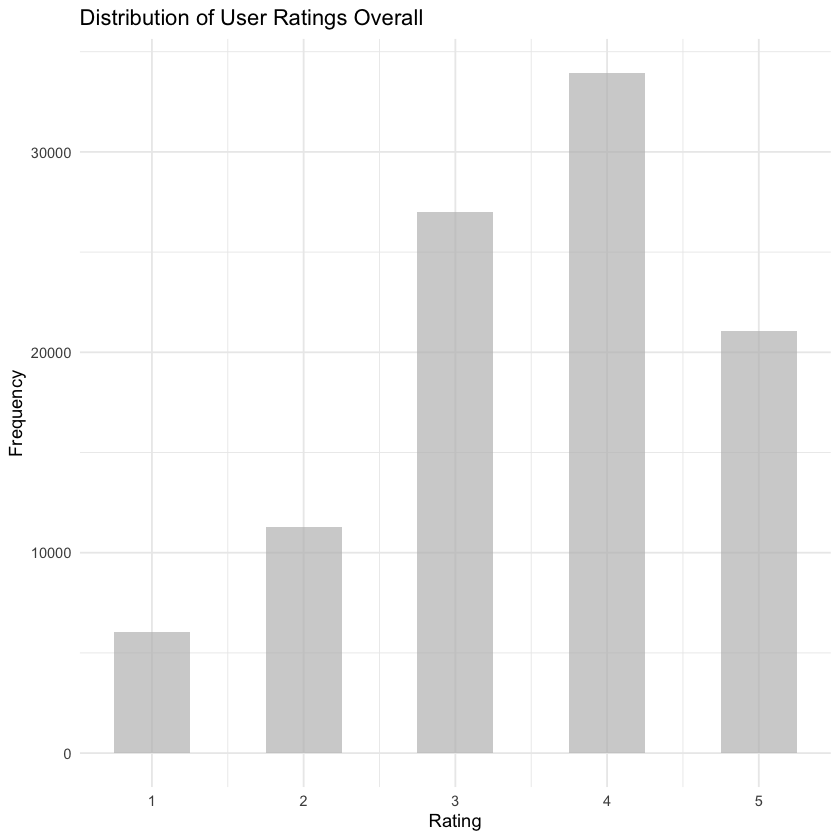

In [10]:
# Distribution of Overall Ratings
ggplot(
  df,
  aes(x = rating)) +
  geom_histogram(binwidth = 0.5, fill = "grey", alpha = 0.7) +
  xlab("Rating") +
  ylab("Frequency") +
  ggtitle("Distribution of User Ratings Overall") +
  theme_minimal()

The distribution of user ratings is overall positive, with the majority of users rating 3 or higher.  
3, 4 and 5 dominate the ratings, but the problem with 3 is that there are users for whom a 3-star rating is a bad rating and for others it is a good rating.  
We will see how to deal with this problem later.

Test passed 


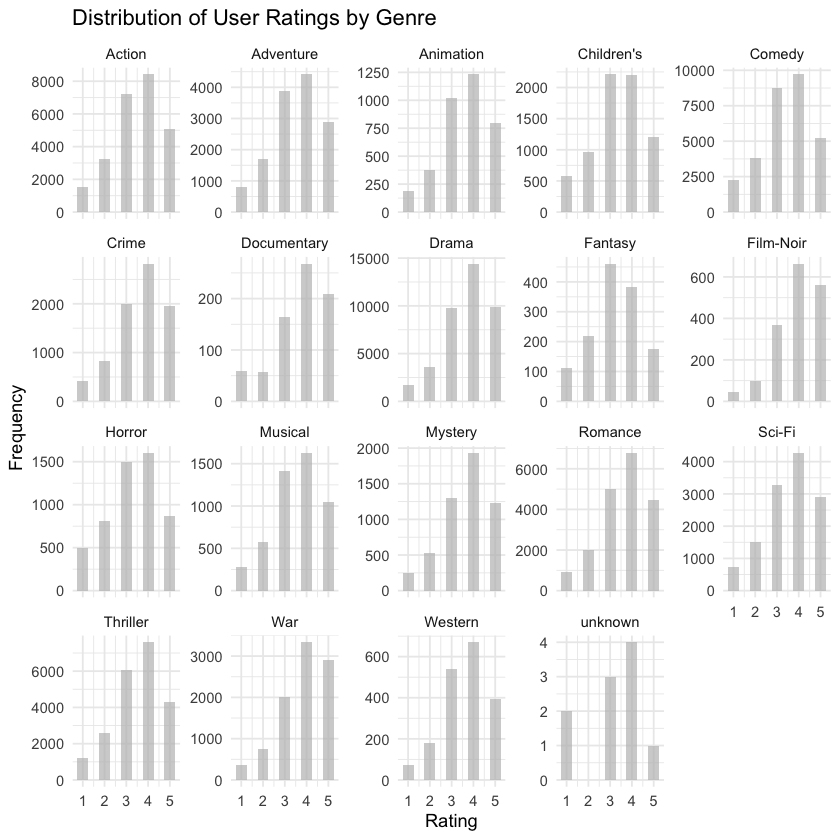

In [11]:
genreRatings <- data.frame()
mergedRatingsGenre <- left_join(df, dfMeta, by = c("item" = "title"))
genreCols <- names(dfMetaGenres)

for(genre in genreCols) {
    # Filter the data to only include ratings for movies that belong to the current genre
    filteredData <- mergedRatingsGenre[mergedRatingsGenre[genre] == 1, ]
    # Add ratings to a new data frame tagged by genre
    rows <- data.frame(rating = filteredData$rating, genre = genre)
    # Add new rows to result data frame
    genreRatings <- rbind(genreRatings, rows)
}
ggplot(
    genreRatings,
    aes(x = rating)) +
    geom_histogram(binwidth = 0.5, fill = "grey", alpha = 0.7) +
    facet_wrap(~genre, scales = "free_y") +
    xlab("Rating") +
    ylab("Frequency") +
    ggtitle("Distribution of User Ratings by Genre") +
    theme_minimal()

# test stuff
test_that("There are more genreRatings because one movie can be specified as multiple genres", {
  expect_false(identical(nrow(genreRatings), nrow(df)))
})

### 3. Wie verteilen sich die mittleren Ratings pro Film bzw. pro Nutzer*in?

item,avgRating
<chr>,<dbl>
Aiqing wansui (1994),5
Entertaining Angels: The Dorothy Day Story (1996),5
"Great Day in Harlem, A (1994)",5
Marlene Dietrich: Shadow and Light (1996),5
Prefontaine (1997),5
"Saint of Fort Washington, The (1993)",5


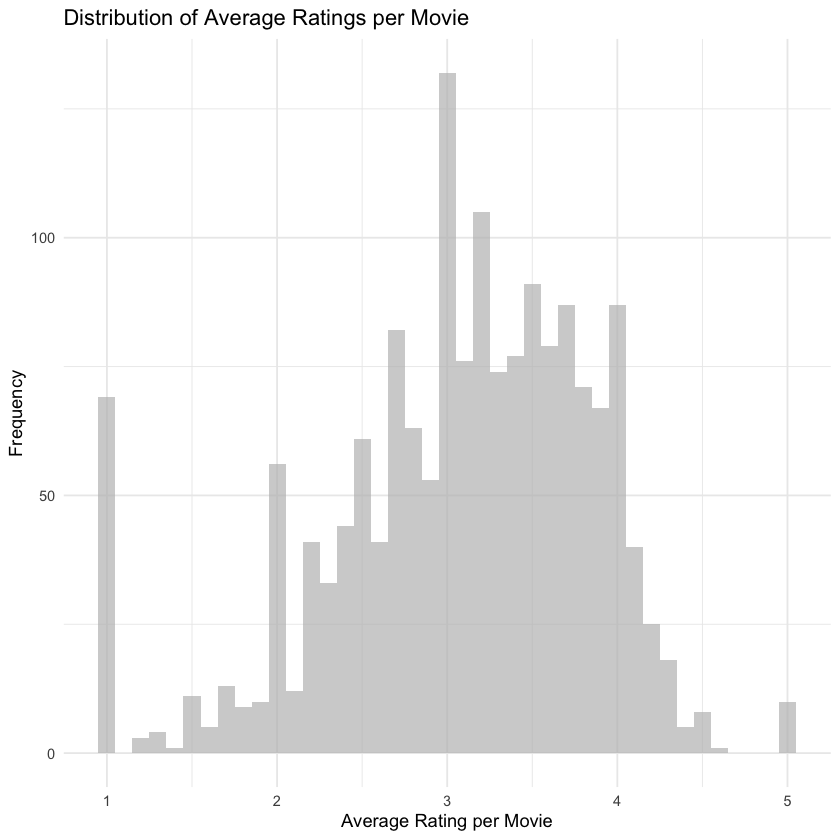

In [12]:
# Average Rating per Movie
avgRatingMovie <- df %>%
    group_by(item) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))
head(avgRatingMovie)
# Distribution of average ratings per movie
ggplot(avgRatingMovie, aes(x = avgRating)) + 
    geom_histogram(binwidth = 0.1, fill = "grey", alpha = 0.7) +
    xlab("Average Rating per Movie") +
    ylab("Frequency") +
    ggtitle("Distribution of Average Ratings per Movie") +
    theme_minimal()

We see that the highest frequency of the average ratings per movie is between 2.5 and 4.  
Therefore most people rated movies between 3 and 4.

user,avgRating
<chr>,<dbl>
849,4.869565
688,4.833333
507,4.724138
628,4.703704
928,4.677419
118,4.661972


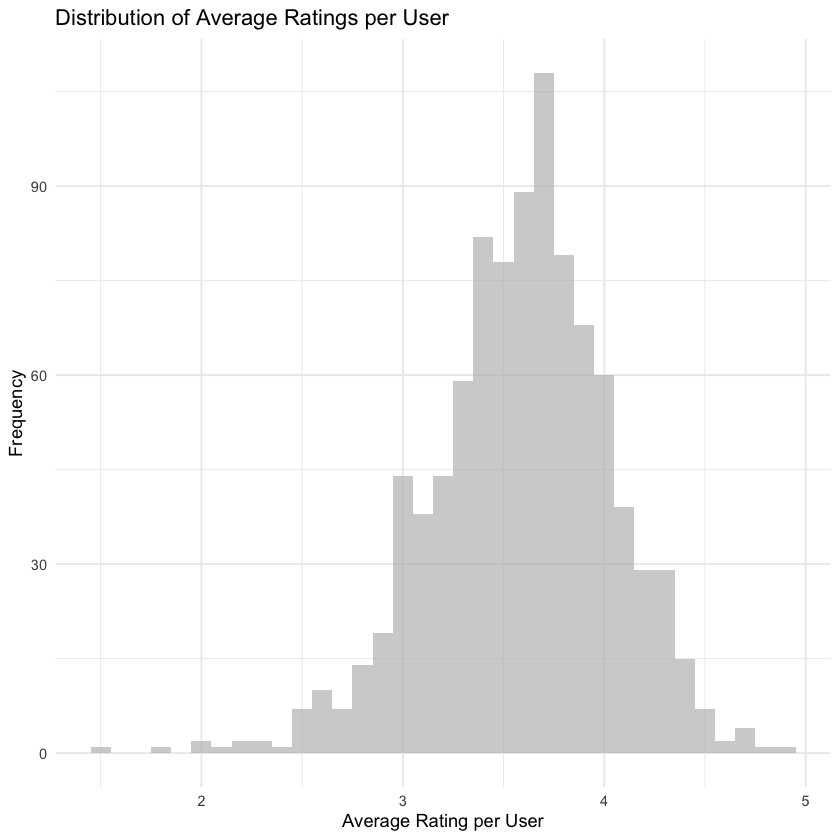

In [13]:
# Average Ratings per User
avgRatingUser <- df %>%
    group_by(user) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))
head(avgRatingUser)
# Distribution of average ratings per user
ggplot(avgRatingUser, aes(x = avgRating)) + 
    geom_histogram(binwidth = 0.1, fill = "grey", alpha = 0.7) +
    xlab("Average Rating per User") +
    ylab("Frequency") +
    ggtitle("Distribution of Average Ratings per User") +
    theme_minimal()

The highest frequency for individual users is between 3.5 and 4.  
That means the average user tends to rate movies generally positive.

### 4. Welchen Einfluss hat die Normierung der Ratings pro Nutzer*in auf die Verteilung der mittleren Nutzer-ratings?
Normalization eliminates user bias in collaborative filtering. Different users may have different rating standards, some may be more generous than others. Normalization centers each users rating around zero, making comparisons between users more meaningful, e.g. a normalized rating of zero would mean that the user finds the object average by their own standards. Before normalization, we do not see a clear difference between users rating preferences, while after normalization we see the similarities between users and their rating preferences, whether negative or positive.

,user,item,rating
,<chr>,<chr>,<dbl>
1,1,Toy Story (1995),1.3948339
453,1,GoldenEye (1995),-0.6051661
584,1,Four Rooms (1995),0.3948339
674,1,Get Shorty (1995),-0.6051661
883,1,Copycat (1995),-0.6051661
969,1,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),1.3948339


Test passed 


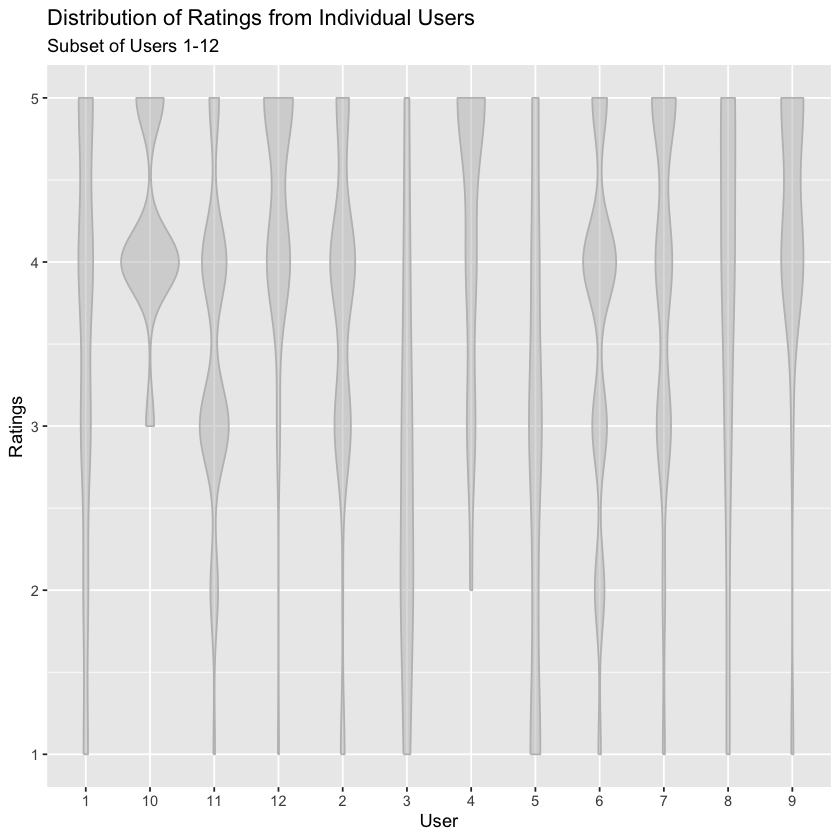

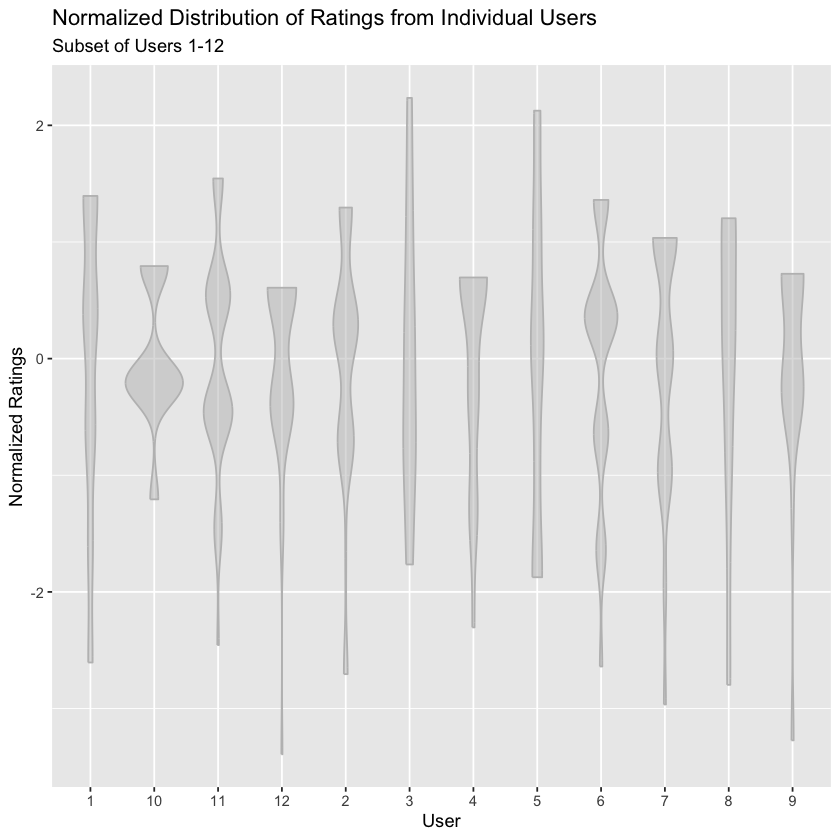

In [14]:
# Normalize the MovieLense data
Norm <- normalize(MovieLense)
dfNorm <- as(Norm, "data.frame")
head(dfNorm)

# Calculate average ratings per user
avgNormRatingUser <- dfNorm %>%
    group_by(user) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))

# test that the mean is around zero
test_that("The mean is around zero", {
    expect_true(all.equal(mean(avgNormRatingUser$avgRating), 0, tolerance = 0.01))
})

# Visualize for a subset of users for non normalized data
df %>% filter(user %in% 1:12) %>%
    ggplot(aes(x = user, y = rating)) +
    geom_violin(color = "grey", fill = "grey", alpha = 0.5) +
    labs(x = "User",
         y = "Ratings",
         title = "Distribution of Ratings from Individual Users",
         subtitle = "Subset of Users 1-12")

# Visualize for a subset of users for normalized data
dfNorm %>% filter(user %in% 1:12) %>%
    ggplot(aes(x = user, y = rating)) +
    geom_violin(color = "grey", fill = "grey", alpha = 0.5) +
    labs(x = "User",
         y = "Normalized Ratings",
         title = "Normalized Distribution of Ratings from Individual Users",
         subtitle = "Subset of Users 1-12")

### 5. Welche strukturellen Charakteristika und Auffälligkeiten zeigt die User-Item Matrix?
The user item matrix represents the interactions or ratings between users and items. 
In the image below the colored dots represent interactions or in our case ratings. 
The large number of empty space indicates that users have not interacted with any item.  
This is a common problem in real world user-item matrices, as not every user interacts with every item.  
The sparsity level of the item-user-matrix for the movielens dataset is ca. 93.7%.  

In [15]:
MovieLense

943 x 1664 rating matrix of class 'realRatingMatrix' with 99392 ratings.

Lade n"otiges Paket: viridisLite



[1] "Sparsity Level:  93.67 %"


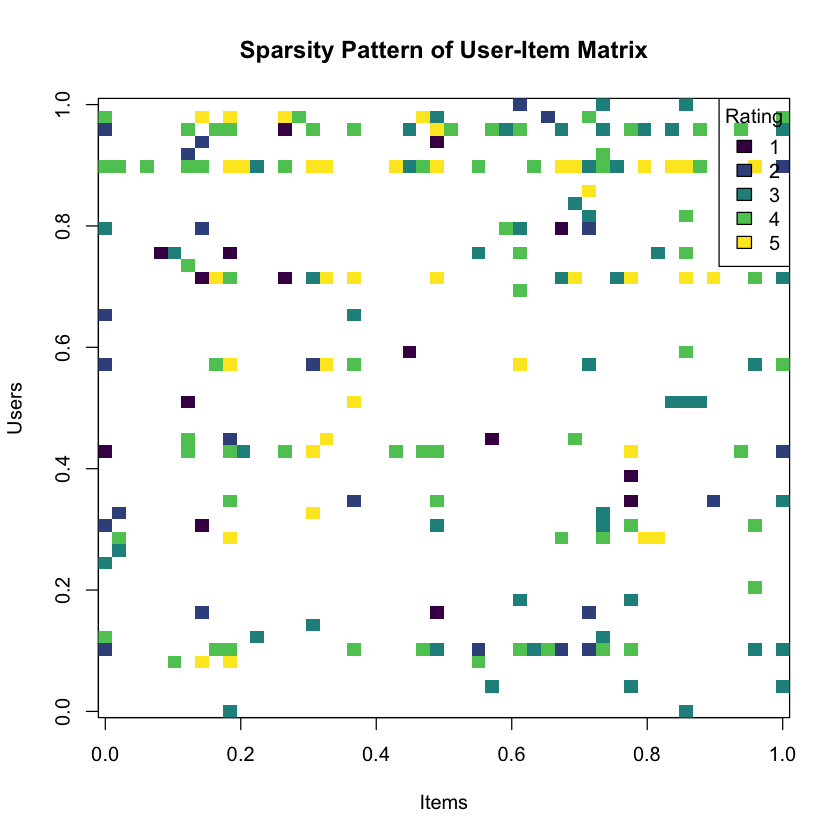

In [16]:
# install.packages("viridis")
library(viridis)
# Set a random seed for reproducibility
set.seed(42)

smallM <- MovieLense[
    sample(nrow(MovieLense), 50),sample(ncol(MovieLense), 50)
]
# Visualize the sparsity pattern of the smallMovieLense matrix
library(Matrix)
image(as(smallM, "matrix"), main = "Sparsity Pattern of User-Item Matrix", xlab = "Items", ylab = "Users", col = viridis(5))
legend("topright", legend = c("1", "2", "3", "4", "5"), fill = viridis(5), title = "Rating")

# Calculate sparsity level
movieMatrix <- as(MovieLense, "matrix")
totalN <- length(movieMatrix)
filledN <- sum(
    !is.na(movieMatrix) & movieMatrix > 0,
    na.rm = TRUE
)
sparsityLevel <- (totalN - filledN) / totalN
print(paste("Sparsity Level: ", round(sparsityLevel * 100, 2), "%"))

## 6.2 Datenredutkion
### Aufgabe 2: Reduziere den MovieLens Datensatz auf rund 400 Nutzerinnen und 700 Filme, indem du Filme und Nutzerinnen mit sehr wenigen Ratings entfernst.
#### 1. Anzahl Filme und Nutzer*innen sowie Sparsity vor und nach Datenreduktion

In [17]:
# Set a random seed for reproducibility
set.seed(42)

# Calculate the number of ratings for each user and each movie
## Count the number of ratings per user
userCount <- df %>%
    group_by(user) %>%
    summarize(freq = n()) %>%
    arrange(desc(freq))
## Count the number of ratings per movie
movieCount <- df %>%
    group_by(item) %>%
    summarize(freq = n()) %>%
    arrange(desc(freq))

# Filter out the users and movies with few ratings
## Filter out users and movies with less than x ratings
fUser <- 80
fMovie <- 40
filteredUsers <- userCount %>%
    filter(freq >= fUser)
filteredMovies <- movieCount %>%
    filter(freq >= fMovie)

## Reduce the dataset
dfReduced <- df %>%
    filter(user %in% filteredUsers$user, item %in% filteredMovies$item)

# Create two different reduced datasets
dfReduced1 <- dfReduced[1:300, ]
dfReduced2 <- dfReduced[101:400, ]

## Calculate sparsity level
calculateSparsity <- function(df) {
    nUsers <- n_distinct(df$user)
    nMovies <- n_distinct(df$item)
    totalInteractions <- nUsers * nMovies
    actualInteractions <- nrow(df)
    sparsity <- 1 - (actualInteractions / totalInteractions)
    return(sparsity)
}

# Investigate
## Number of movies, users, sparsity level before and after
nUsersBefore <- n_distinct(df$user)
nMoviesBefore <- n_distinct(df$item)
nUsersAfter <- n_distinct(dfReduced$user)
nMoviesAfter <- n_distinct(dfReduced$item)
sparsityBefore <- calculateSparsity(df)
sparsityAfter1 <- calculateSparsity(dfReduced1)
sparsityAfter2 <- calculateSparsity(dfReduced2)
cat("Treshold x for user ratings:", fUser, "\n")
cat("Treshold y for movie ratings:", fMovie, "\n")
cat("Number of users after:", nUsersAfter, "\n")
cat("Relative reduction of users:", round((nUsersBefore - nUsersAfter) / nUsersBefore * 100, 2), "%\n")
cat("Number of movies after:", nMoviesAfter, "\n")
cat("Relative reduction of movies:", round((nMoviesBefore - nMoviesAfter) / nMoviesBefore * 100, 2), "%\n")
cat("Sparsity level before:", round(sparsityBefore * 100, 2), "%\n")
cat("Sparsity level after for reduced dataset 1:", round(sparsityAfter1 * 100, 2), "%\n")
cat("Sparsity level after for reduced dataset 2:", round(sparsityAfter2 * 100, 2), "%\n")

Treshold x for user ratings: 80 
Treshold y for movie ratings: 40 
Number of users after: 411 
Relative reduction of users: 56.42 %
Number of movies after: 705 
Relative reduction of movies: 57.63 %
Sparsity level before: 93.67 %
Sparsity level after for reduced dataset 1: 37.5 %
Sparsity level after for reduced dataset 2: 59.68 %


Filtering out users with ratings less or equal than 80 gives us ca. 400 users and filtering out movies with ratings less or equal than 80 gives us ca. 700 movies.  
The relative reduction for both are now round about 55%.  
The sparsity level of the item-user-matrix for the reduced dataset is ca. 75%.  
That means we reduced the dataset by 55% but only reduced the sparsity by 20%.  
Dividing the reduced dataset further into two datasets where the first one has the 300 users with the most ratings and the second one has the users from 100 up to 400.  
The sparsity level of the item-user-matrix for the first dataset is ca. 37% and for the second dataset ca. 60%.  

#### 2. Mittlere Nutzerratings pro Film vor und nach Datenreduktion.

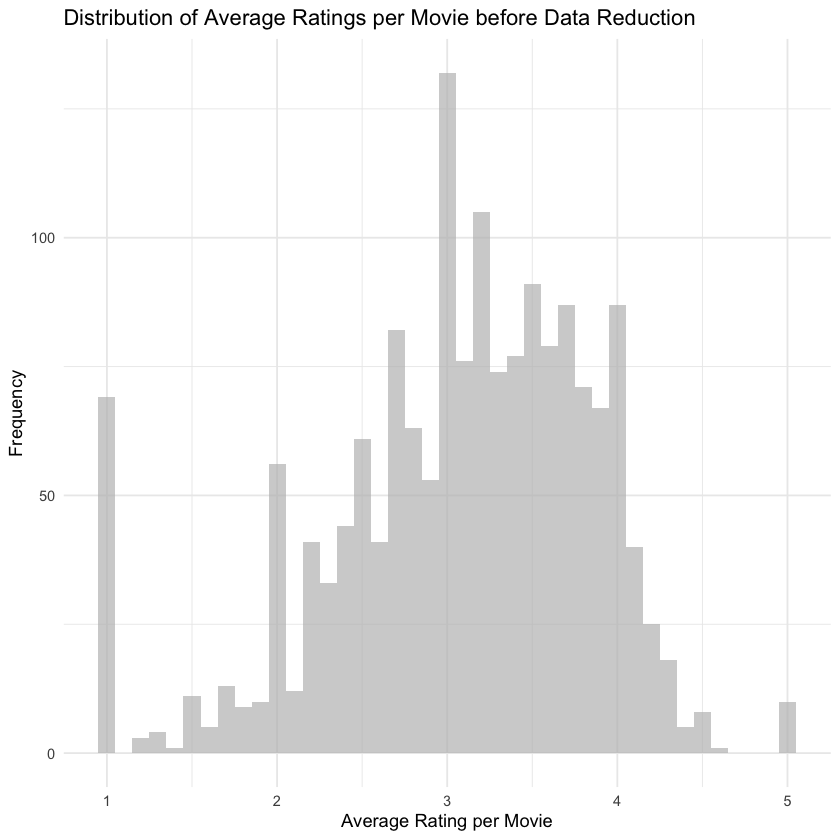

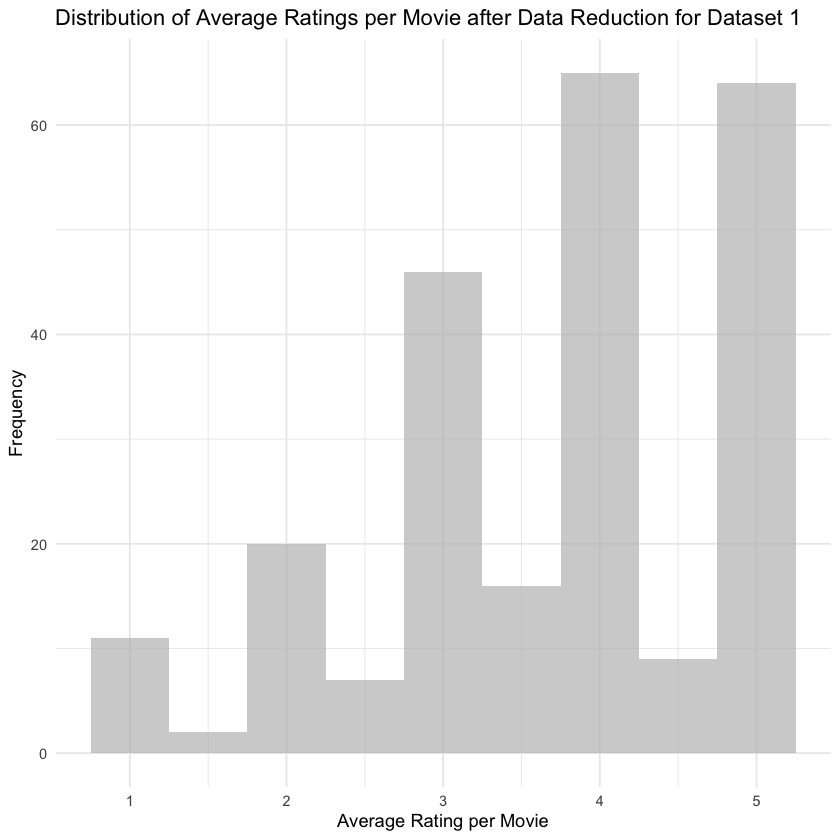

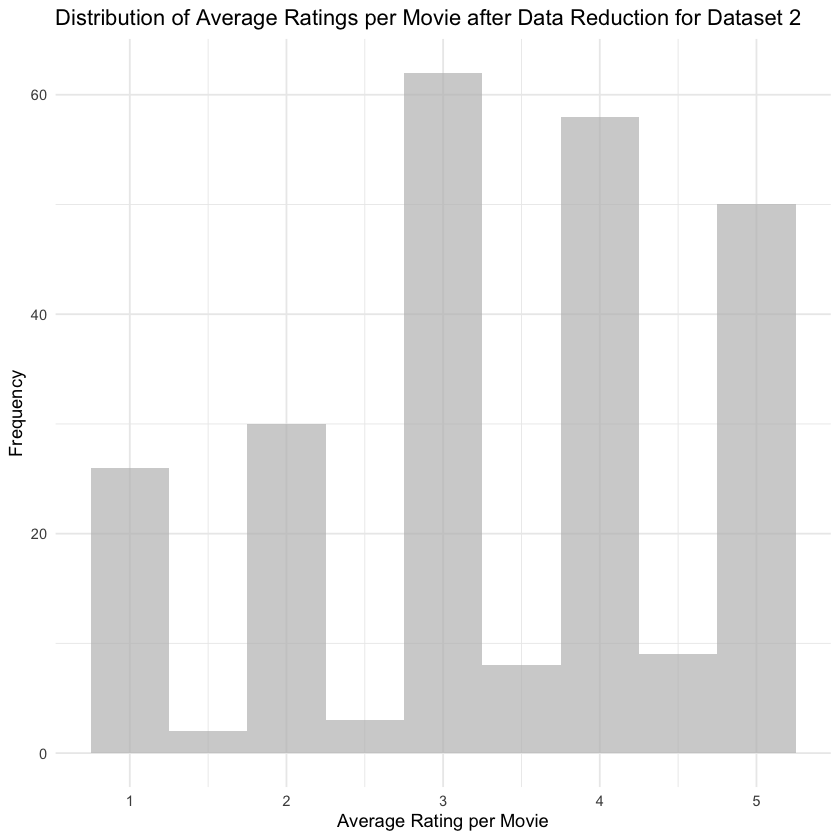

In [18]:
avgRatingMovieBefore <- df %>%
    group_by(item) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))

avgRatingMovieAfter1 <- dfReduced1 %>%
    group_by(item) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))

avgRatingMovieAfter2 <- dfReduced2 %>%
    group_by(item) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))


ggplot(avgRatingMovieBefore, aes(x = avgRating)) + 
    geom_histogram(binwidth = 0.1, fill = "grey", alpha = 0.7) +
    xlab("Average Rating per Movie") +
    ylab("Frequency") +
    ggtitle("Distribution of Average Ratings per Movie before Data Reduction") +
    theme_minimal()
ggplot(avgRatingMovieAfter1, aes(x = avgRating)) +
    geom_histogram(binwidth = 0.5, fill = "grey", alpha = 0.7) +
    xlab("Average Rating per Movie") +
    ylab("Frequency") +
    ggtitle("Distribution of Average Ratings per Movie after Data Reduction for Dataset 1") +
    theme_minimal()
ggplot(avgRatingMovieAfter2, aes(x = avgRating)) +
    geom_histogram(binwidth = 0.5, fill = "grey", alpha = 0.7) +
    xlab("Average Rating per Movie") +
    ylab("Frequency") +
    ggtitle("Distribution of Average Ratings per Movie after Data Reduction for Dataset 2") +
    theme_minimal()

Due to the further reduction of the dataset into two datasets, we see less frequency between the ratings.  
Therefore the binwidth has to be adjusted.  
Both datasets have some similarities in the distribution although the first ones ratings are on average higher,  
whereas the second ones ratings are on average lower.  
The users with the most ratings tend to rate higher than the users with less ratings.

#### 3. Zusatz für Gruppen: Quantifiziere die “Intersection over Union” aller reduzierten Datensätze paarweise.

In [19]:
# Calculate Intersection over Union
userIntersect <- intersect(dfReduced1$user, dfReduced2$user)
userUnion <- union(dfReduced1$user, dfReduced2$user)
userIoU <- length(userIntersect) / length(userUnion)
cat("Intersection over Union for users:", userIoU, "\n")
movieIntersect <- intersect(dfReduced1$item, dfReduced2$item)
movieUnion <- union(dfReduced1$item, dfReduced2$item)
movieIoU <- length(movieIntersect) / length(movieUnion)
cat("Intersection over Union for movies:", movieIoU, "\n")

Intersection over Union for users: 0.6666667 
Intersection over Union for movies: 0.6052632 


The intersection over union is a measure of the overlap between two data sets.  
For the user IoU, there is an overlap of about 67% between the first and second data sets.  
For the movies IoU, the overlap between the first and second data sets is about 60%.  
The overlap is quite reasonable and therefore the data sets are not too similar.  
We could reduce the similarity by choosing other splitting techniques, e.g. instead of 400 users we could have 700,  
and the indexing could range from 1 to 500 and from 201 to 700 and see how the IoU behaves.

# 6.3 Analyse Ähnlichkeitsmatrix
## Aufgabe 3: Erzeuge einen IBCF Recommender und analysiere die Ähnlichkeitsmatrix des trainierten Modelles für den reduzierten Datensatz.
### 1. Zerlege den Datensatz in Trainings- und Testdaten im verhältnis 4:1.

In [20]:
# convert from df to realRatingMatrix
matrixReduced1 <- as(dfReduced1, "realRatingMatrix")

evalScheme <- evaluationScheme(
    matrixReduced1,
    method = "split",
    train = 0.8,
    given = 5,
    goodRating = 4
)
evalScheme

Evaluation scheme with 5 items given
Method: 'split' with 1 run(s).
Training set proportion: 0.800
Good ratings: >=4.000000
Data set: 2 x 240 rating matrix of class 'realRatingMatrix' with 300 ratings.

### 2. Trainiere ein IBCF Modell mit 30 Nachbarn und Cosine Similarity.

In [22]:
# Get the training set from the evaluationScheme object
trainData <- getData(evalScheme, "train")
testData <- getData(evalScheme, "known")

# Train the IBCF model
trainedModel <- Recommender(
    trainData, method = "IBCF", param = list(k = 30, method = "Cosine")
)

### 3. Bestimme die Filme, die am häufigsten in der Cosine-Ähnlichkeitsmatrix auftauchen und analyisiere Vorkommen und Ratings im reduzierten Datensatz.

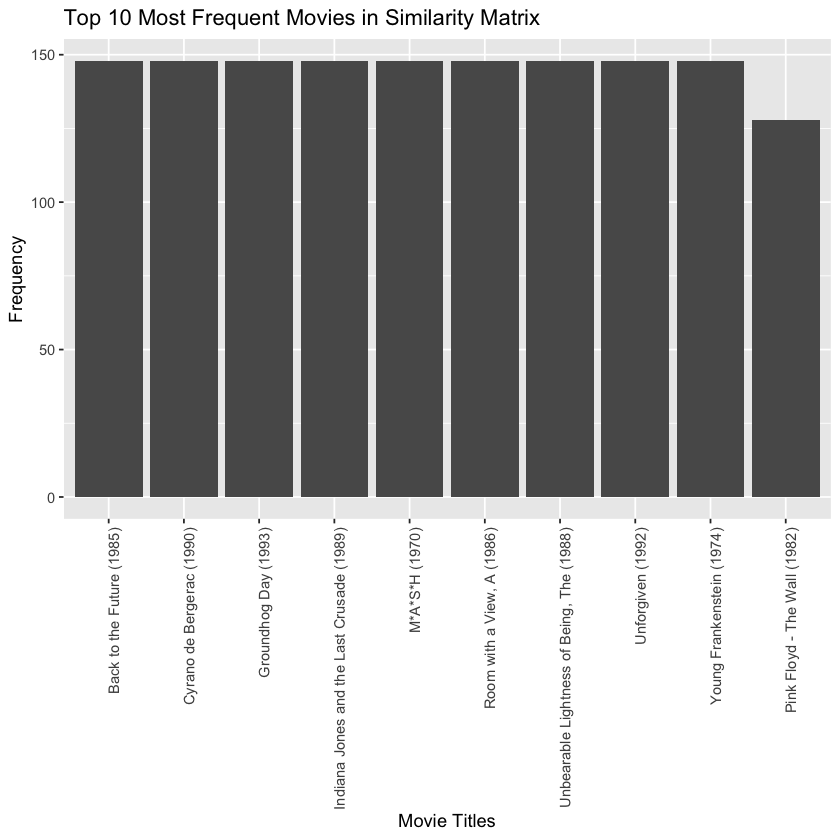

In [23]:
# Access the trained models list
modelList <- getModel(trainedModel)

# Extract the similiraty matrix
simMatrix <- modelList$sim

# Find the top 10 most similar movies
top10 <- apply(simMatrix, 1, function(x)
    order(x, decreasing = TRUE)[1:10]
)

# Unlist and tabulate to find most frequent
mostFrequentMovies <- table(as.vector(top10))
# Sort
mostFrequentMovies <- sort(mostFrequentMovies, decreasing = TRUE)

# process for ggplot2
dfMostFrequentMovies <- as.data.frame(mostFrequentMovies)
colnames(dfMostFrequentMovies) <- c("item", "freq")

# get the names for the movies for given ids in mostFreqentMovies
dfMostFrequentMovies$MovieTitle <- dfMeta[as.numeric(names(mostFrequentMovies)), "title"]
# Visualize
ggplot(
    head(dfMostFrequentMovies, 10),
    aes(x = reorder(MovieTitle, -freq), y = freq)) +
    geom_bar(stat = "identity") +
    xlab("Movie Titles") +
    ylab("Frequency") +
    ggtitle("Top 10 Most Frequent Movies in Similarity Matrix") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)
)

### 4. Wiederhole die Analyse, indem du bei der Datenpartitionierung die Anzahl nicht-maskierter Produkte der Test-User veränderst und kommentiere den Einfluss auf die Resultate.

In [24]:
trainSize <- length(dfReduced1$user) * 0.8
testSize <- length(dfReduced1$user) * 0.2
cat("Train size:", trainSize, "\n")
cat("Test size:", testSize, "\n")

Train size: 240 
Test size: 60 


Processing for given = 5 
Processing for given = 10 


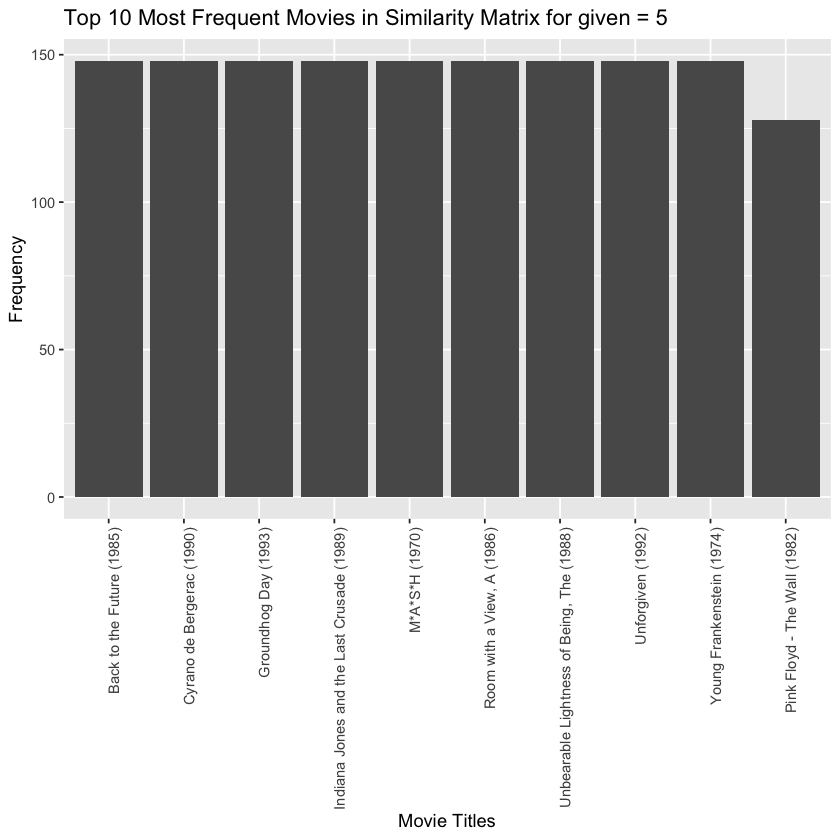

Processing for given = 20 


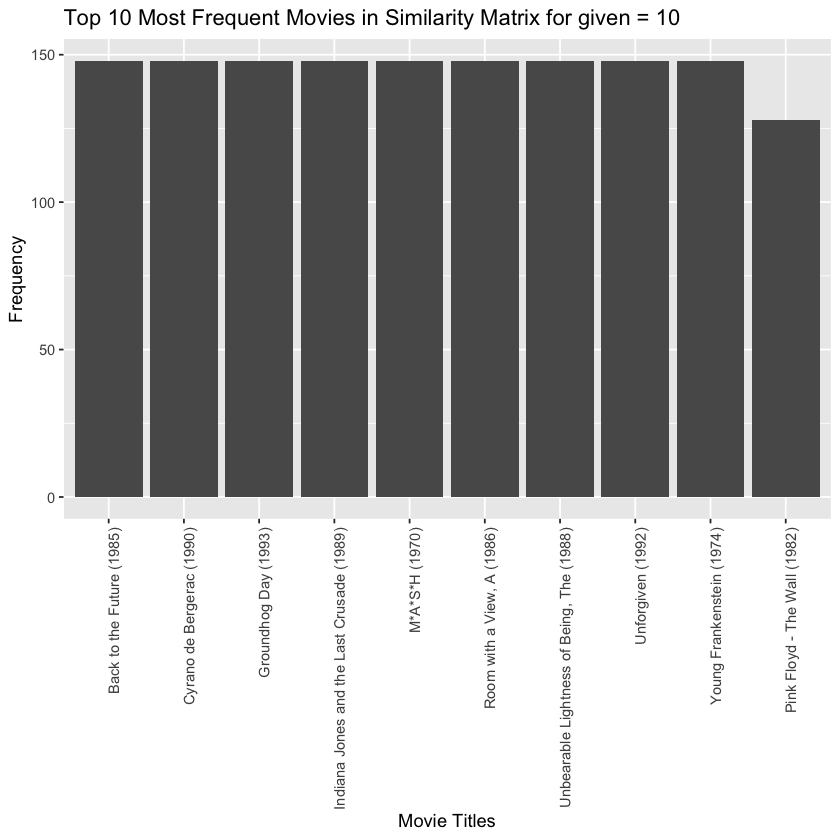

Processing for given = 40 


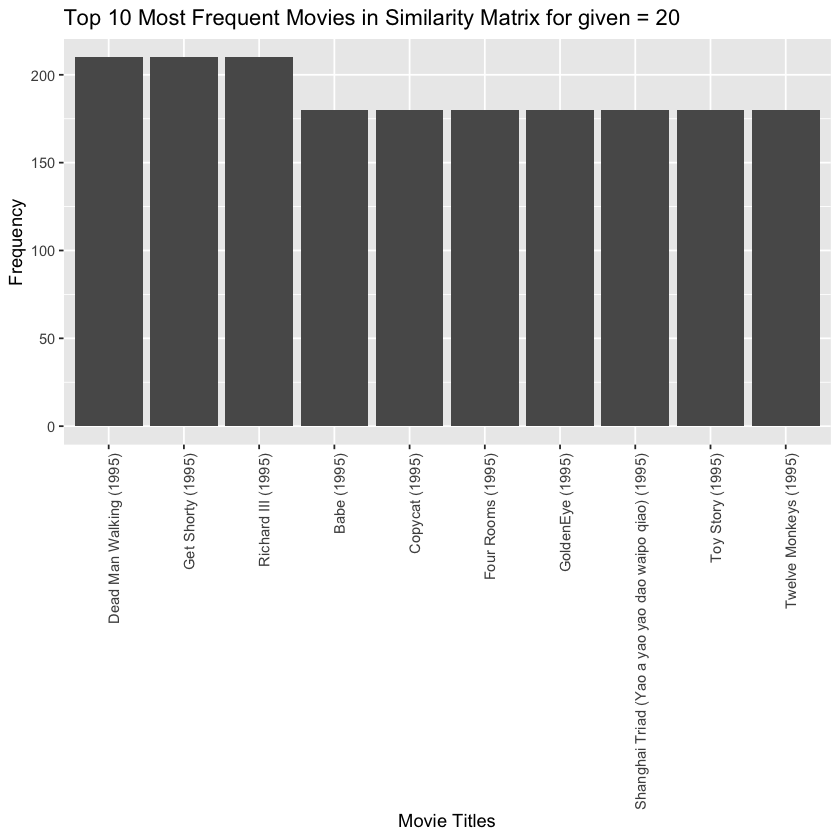

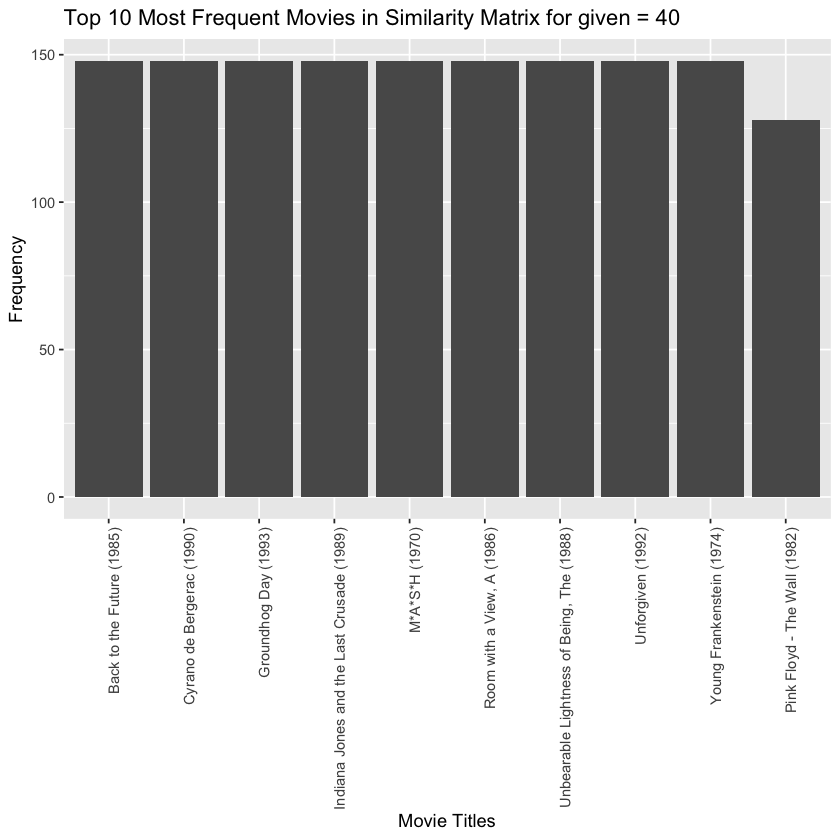

In [25]:
# Convert from df to realRatingMatrix
matrixReduced1 <- as(dfReduced1, "realRatingMatrix")

# Define the given values to iterate over
given_values <- c(5, 10 , 20, 40)

# Iterate over the different given values
for (given in given_values) {
    cat("Processing for given =", given, "\n")
    
    # Create evaluation scheme
    evalScheme <- evaluationScheme(
        matrixReduced1,
        method = "split",
        train = 0.8,
        given = given,
        goodRating = 4
    )
    
    # Train the IBCF model
    trained_model <- Recommender(
        getData(evalScheme, "train"), 
        method = "IBCF", 
        param = list(k = 30, method = "Cosine")
    )

    # Extract the similarity matrix
    simMatrix <- getModel(trained_model)$sim

    # Find the top 10 most similar movies
    top10 <- apply(simMatrix, 1, function(x)
        order(x, decreasing = TRUE)[1:10]
    )

    # Unlist and tabulate to find most frequent
    mostFrequentMovies <- table(as.vector(top10))
    # Sort
    mostFrequentMovies <- sort(mostFrequentMovies, decreasing = TRUE)

    # Process for ggplot2
    dfMostFrequentMovies <- as.data.frame(mostFrequentMovies)
    colnames(dfMostFrequentMovies) <- c("item", "freq")

    # Get the names for the movies for given ids in mostFreqentMovies
    dfMostFrequentMovies$MovieTitle <- dfMeta[as.numeric(names(mostFrequentMovies)), "title"]
    
    # Visualize
    p <- ggplot(
        head(dfMostFrequentMovies, 10),
        aes(x = reorder(MovieTitle, -freq), y = freq)) +
        geom_bar(stat = "identity") +
        xlab("Movie Titles") +
        ylab("Frequency") +
        ggtitle(paste("Top 10 Most Frequent Movies in Similarity Matrix for given =", given)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)
    )
    print(p)
    # ggsave(paste("similarity_matrix_given_", given, ".png", sep=""))
}

The IBCF Recommender uses a test set $Y$ of user profiles that are not part of the training but of the predictions. Additionally, there is a set $Z$ of masked ratings to evaluate the prediction. For the masking process we use the parameter `Given-x` which randomly selects $x$ from all test users for the prediction, the rest is part of the evaluation. We see that for different given values the same result is not always obtained, e.g. the recommendation results for given = 20 differ from those of the others.

# 6.4 Implementierung Ähnlichkeitsmatrix
## Aufgabe 4 (DIY): Implementiere Funktionen zur Berechnung von Ähnlichkeitsmatrizen bei IBCF Recommenders für (a) Cosine Similarity mit ordinale Ratings und (b) Jaccard Similarity mit binären Ratings

In [28]:
# Function to compute Cosine Similarity Matrix
calculateCosineSimilarity <- function(ratingMatrix) {
    similarityMatrix <- similarity(
        ratingMatrix,
        method = "cosine",
        which = "items"
    )
    return(as.matrix(similarityMatrix))
}
# Convert data frame to realRatingMatrix
matrixReduced1 <- as(dfReduced1, "realRatingMatrix")
cosineSimMatrix <- calculateCosineSimilarity(matrixReduced1)
print(head(cosineSimMatrix, n=1))

                      101 Dalmatians (1996) 12 Angry Men (1957)
101 Dalmatians (1996)                    NA                   1
                      20,000 Leagues Under the Sea (1954)
101 Dalmatians (1996)                                   1
                      2001: A Space Odyssey (1968) Abyss, The (1989)
101 Dalmatians (1996)                            1                 1
                      Ace Ventura: Pet Detective (1994) Air Bud (1997)
101 Dalmatians (1996)                                 1              1
                      Akira (1988) Aladdin (1992) Alien (1979) Aliens (1986)
101 Dalmatians (1996)            1              1            1             1
                      Amadeus (1984) Angels and Insects (1995)
101 Dalmatians (1996)              1                         1
                      Antonia's Line (1995) Apocalypse Now (1979)
101 Dalmatians (1996)                     1                     1
                      Apollo 13 (1995) Aristocats, The (1970)
10

In [51]:
library(recommenderlab)

# Ensure dfReduced1 is loaded and structured correctly
# Assuming dfReduced1 is a dataframe with columns "user", "item", and "rating"

# Convert the user and item columns to factors if they are characters
dfReduced1$user <- as.factor(dfReduced1$user)
dfReduced1$item <- as.factor(dfReduced1$item)

# Create a realRatingMatrix from dfReduced1
matrixReduced1 <- as(dfReduced1, "realRatingMatrix")

# Helper function to manually convert ordinal ratings to binary
convert_to_binary <- function(ratingMatrix, threshold = 4) {
    # Get the data slot from the matrix
    data <- ratingMatrix@data
    # Convert ratings to binary (1 if rating >= threshold, 0 otherwise)
    data@x <- as.numeric(data@x >= threshold)
    # Create a new binary matrix with the same dimensions
    binaryMatrix <- new("realRatingMatrix", data = data)
    return(binaryMatrix)
}

# Function to compute Jaccard Similarity Matrix
calculate_jaccard_similarity <- function(ratingMatrix) {
    binaryMatrix <- convert_to_binary(ratingMatrix)
    similarityMatrix <- similarity(
        binaryMatrix,
        method = "jaccard",
        which = "items"
    )
    return(as.matrix(similarityMatrix))
}

# Calculate Jaccard Similarity Matrix
jaccardSimMatrix <- calculate_jaccard_similarity(matrixReduced1)

# Print the first row of the similarity matrix
print(head(jaccardSimMatrix, n=5))


                                    101 Dalmatians (1996) 12 Angry Men (1957)
101 Dalmatians (1996)                                  NA                  NA
12 Angry Men (1957)                                    NA                  NA
20,000 Leagues Under the Sea (1954)                    NA                  NA
2001: A Space Odyssey (1968)                           NA                   1
Abyss, The (1989)                                      NA                  NA
                                    20,000 Leagues Under the Sea (1954)
101 Dalmatians (1996)                                                NA
12 Angry Men (1957)                                                  NA
20,000 Leagues Under the Sea (1954)                                  NA
2001: A Space Odyssey (1968)                                         NA
Abyss, The (1989)                                                    NA
                                    2001: A Space Odyssey (1968)
101 Dalmatians (1996)              

### 1. Vergleiche die Resultate beider Funktionen hinsichtlich Übereinstimmung und Laufzeit mit dem Resultat der Funktion Recommender() und der eines anderen R-Paketes anhand 100 zufällig gewählter Filme
### 2. Visualisiere und vergleiche die Verteilung der Ähnlichkeiten von Cosine Similarity für ordinale Ratings und von Jaccard Similarity für binäre Ratings mittels den von dir implementierten Funktionen.

,user,item,rating
,<fct>,<fct>,<dbl>
1,1,Toy Story (1995),5
